# Assignment 3

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from Chandan_Library_As3 import *


# Question 1a - Power method


In [2]:
matrix = np.array([[4, 2/3, -4/3, 4/3], 
                [2/3, 4, 0, 0], 
                [-4/3, 0, 6, 2], 
                [4/3, 0, 2, 6]])

tol = 1e-6
x0 = np.ones(len(matrix))      # initial guess vector
y = x0

evalue, evec, c = Power_eval_evect(matrix, x0, y, tol) 

print("Dominant eigenvalue = ", np.round(evalue, 4))
print("Corresponding normalised eigenvector = ", np.round(evec, 4))
print("No of iterations = ", c)


Dominant eigenvalue =  8.0
Corresponding normalised eigenvector =  [0.     0.     0.7071 0.7071]
No of iterations =  45


# Question 1b - QR method


In [3]:
matrix = np.array([[4, 2/3, -4/3, 4/3], 
                [2/3, 4, 0, 0], 
                [-4/3, 0, 6, 2], 
                [4/3, 0, 2, 6]])

eigenvalues = QR_factorisation_eigenvalues(matrix)
print("List of eigenvalues found using QR factorisation:", eigenvalues)


List of eigenvalues found using QR factorisation: [6.0, 4.0, 8.0, 2.0]


# Question 2a - Least square fit for polynomials

Coefficients of the fitted polynomial are
[  0.57465867   4.72586144 -11.12821778   7.66867762]

Covariance matrix is
[[ 0.05595529 -0.25917649 -0.1250564  -0.05338708]
 [-0.02019591  0.3732283   0.64369425  0.04671977]
 [ 0.00249815  0.18926241 -0.3993122   0.71869473]
 [ 0.00345973  0.03008641 -0.22993924 -0.82105463]]

Condition no.:  35.863147894664806


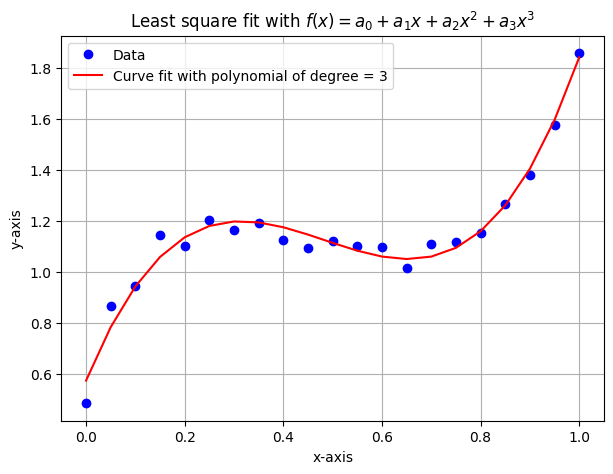

In [4]:
# Read input data from text file
f=open('assign3fit.txt','r')
DATA = [[float(num) for num in line.split(' ')] for line in f]
DATA = np.array(DATA)
x, y = DATA[:,0], DATA[:,1]

# Curve fitting - finding solution coefficients
solution, covariance_matrix = polynomial_fitting(x, y, 3)

# Printing solution coefficients
print("Coefficients of the fitted polynomial are")
print(solution)

# Printing covariance matrix
print("\nCovariance matrix is")
print(covariance_matrix)

# Calculating condition number
condition_no = np.linalg.cond(covariance_matrix, 1)
print("\nCondition no.: ",condition_no)

# Plotting
plt.figure(figsize=(7,5))
plot_graph_poly(x,y, solution, 3)
plt.title(r"Least square fit with $f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$")
plt.show()


# Question 2b - Fitting using Chebyshev polynomials


Coefficients of the fitted polynomial are
[1.15947393 0.36666895 0.04124152 0.1666964 ]

Covariance matrix is
[[5.55439983e-02 3.95771987e-18 2.99673641e-02 5.33538115e-17]
 [2.07654752e-17 1.31658868e-01 1.04884687e-18 3.75031863e-02]
 [2.97185652e-02 7.55452373e-19 1.12377615e-01 1.27107388e-17]
 [5.20754214e-17 4.86070011e-03 3.84697642e-19 1.01910832e-01]]

Condition no.:  3.7797584043100394


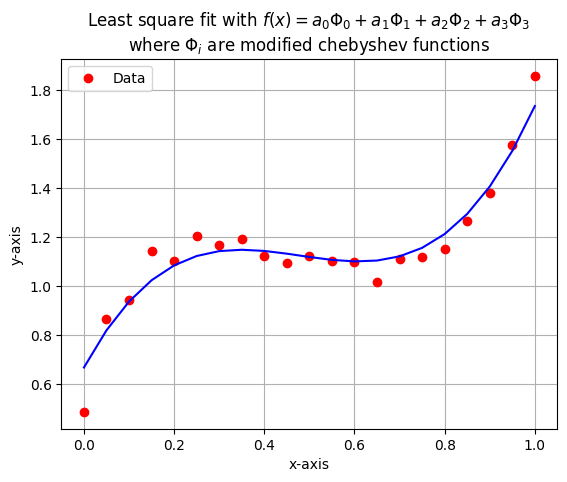

In [5]:
# Read input data from text file
f=open('assign3fit.txt','r')
DATA = [[float(num) for num in line.split(' ')] for line in f]
DATA = np.array(DATA)
x, y = DATA[:,0], DATA[:,1]

# Curve fitting - finding solution coefficients
solution, covariance_matrix = chebyshev_fitting(x, y, 3)

# Printing solution coefficients
print("Coefficients of the fitted polynomial are")
print(solution)

# Printing covariance matrix
print("\nCovariance matrix is")
print(covariance_matrix)

# Calculating condition number
condition_no = np.linalg.cond(covariance_matrix, 1)
print("\nCondition no.: ",condition_no)

Y_sol = [sum(solution[j] * chebyshev(data[0], j) for j in range(len(solution))) for data in DATA]

# plotting X and y_fit
plt.plot(x, y,'ro', label="Data")
plt.plot(x, Y_sol, 'b')
plt.title(r"Least square fit with $f(x)=a_0 Φ_0 + a_1 Φ_1 + a_2 Φ_2 + a_3 Φ_3$ "+"\nwhere "+r"$Φ_i$ are modified chebyshev functions")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.legend()
plt.grid()

plt.show()


### As we can see the condition no. for Chevshev fitting (3.7798) is very less compared to condition no. of Cubic Least Square Fitting (35.8631).
### Less condition no. means fitting parameteres less prone to change due to small perturbation in data
### Therefore Chevshev fitting is less prone to change due to small perturbation in data compared to Cubic Least Square Fitting.


# Question 3 - $\chi^2$-test


Grade categories: ['A' 'B' 'C' 'D' 'F']
Observed frequencies: [ 77 150 210 125  38]
Expected frequencies: [ 32.39457991 145.18243471 239.36536824 145.18243471  32.39457991]

Chi-square statistic: 68.95701662769245
Degrees of Freedom: 4

Critical Value at 5% level of significance: 9.487729036781154
Critical Value at 10% level of significance: 7.779440339734858



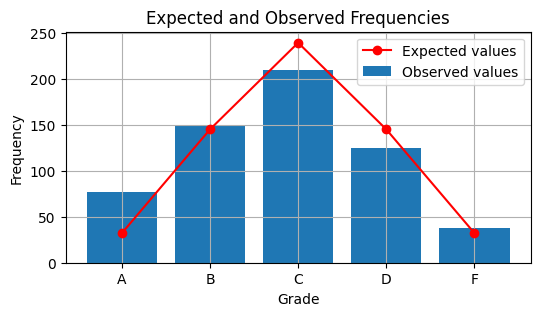

5% significance level: The distribution is not normal. The null hypothesis is rejected.
10% significance level: The distribution is not normal. The null hypothesis is rejected.


In [6]:
# Given data
Grade = np.array(['A', 'B', 'C', 'D', 'F'])     # Grade categories
G_No = np.arange(len(Grade))                    # Grade category numbers
Observed = np.array([77, 150, 210, 125, 38])    # Observed frequencies

def get_expected_normal_distribution(G_No, Observed):
    # Calculate probabilities for each grade category using the standard normal distribution
    def standard_normal_pdf(x):
        return np.exp(-0.5 * (x-np.mean(G_No))**2) / np.sqrt(2 * np.pi)

    Expected = standard_normal_pdf(G_No) * np.sum(Observed)

    return Expected

# Calculate expected frequencies using the standard normal distribution
Expected = get_expected_normal_distribution(G_No, Observed)

# Chi-square test statistic
chi2_statistic = np.sum((Observed - Expected)**2 / Expected)

# Degrees of freedom (number of categories - 1)
df = len(Grade) - 1

# Critical values for 5% and 10% level of significance
critical_value_5 = stats.chi2.ppf(0.95, df)
critical_value_10 = stats.chi2.ppf(0.90, df)

# Print test results
print("Grade categories:", Grade)
print("Observed frequencies:", Observed)
print("Expected frequencies:", Expected)
print()
print("Chi-square statistic:", chi2_statistic)
print("Degrees of Freedom:", df)
print()
print("Critical Value at 5% level of significance:", critical_value_5)
print("Critical Value at 10% level of significance:", critical_value_10)
print()

# Plot observed vs expected frequencies
plt.figure(figsize=(6, 3))
plt.bar(Grade, Observed, label='Observed values')
plt.plot(Grade, Expected, 'ro-', label='Expected values')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Expected and Observed Frequencies')
plt.legend()
plt.grid(True)
plt.show()

# Determine if null hypothesis is rejected or not
if chi2_statistic > critical_value_5:
    print("5% significance level: The distribution is not normal. The null hypothesis is rejected.")
else:
    print("5% significance level: Failed to reject the null hypothesis. The distribution may be normal.")

if chi2_statistic > critical_value_10:
    print("10% significance level: The distribution is not normal. The null hypothesis is rejected.")
else:
    print("10% significance level: Failed to reject the null hypothesis. The distribution may be normal.")


# Question 4 - F-test


In [7]:
# Data for focal length of two shipments in cm
Shipment_A = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80])
Shipment_B = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate mean and standard deviation of the two shipments
mean_A, std_dev_A = np.mean(Shipment_A), np.std(Shipment_A)
mean_B, std_dev_B = np.mean(Shipment_B), np.std(Shipment_B)

# Calculated F-statistic
F_statistic = std_dev_A**2 / std_dev_B**2

# Critical value for 5% and 10% confidence level
critical_value_5 = stats.f.ppf(0.95, len(Shipment_A)-1, len(Shipment_B)-1)
critical_value_10 = stats.f.ppf(0.90, len(Shipment_A)-1, len(Shipment_B)-1)

print("Mean and standard deviation of Shipment A:", np.round(mean_A, 4), np.round(std_dev_A, 4))
print("Mean and standard deviation of Shipment B:", np.round(mean_B, 4), np.round(std_dev_B, 4))
print()
print("F-statistic:", F_statistic)
print("Critical Value at 5% level of significance:", critical_value_5)
print("Critical Value at 10% level of significance:", critical_value_10)
print()

if F_statistic > critical_value_5:
    print("5% significance level: The null hypothesis is rejected. The variance of the two populations are quite different.")
else:
    print("5% significance level: Failed to reject the null hypothesis. The variance of the two populations are close.")

if F_statistic > critical_value_10:
    print("10% significance level: The null hypothesis is rejected. The variance of the two populations are quite different.")
else:
    print("10% significance level: Failed to reject the null hypothesis. The variance of the two populations are close.")



Mean and standard deviation of Shipment A: 4.7146 0.0973
Mean and standard deviation of Shipment B: 4.74 0.0697

F-statistic: 1.9499129829446638
Critical Value at 5% level of significance: 3.9999353833188764
Critical Value at 10% level of significance: 2.904720508833658

5% significance level: Failed to reject the null hypothesis. The variance of the two populations are close.
10% significance level: Failed to reject the null hypothesis. The variance of the two populations are close.


# Question 4 - t-test


In [8]:
# Data for focal length of two shipments in cm
Shipment_A = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80])
Shipment_B = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate mean and standard deviation of the two shipments
mean_A, std_dev_A = np.mean(Shipment_A), np.std(Shipment_A)
mean_B, std_dev_B = np.mean(Shipment_B), np.std(Shipment_B)

# Degrees of freedom
df = len(Shipment_A) + len(Shipment_B) - 2

# Calculate the pooled standard deviation
pooled_std_dev = np.sqrt(((len(Shipment_A)-1)*std_dev_A**2 + (len(Shipment_B)-1)*std_dev_B**2) / df)

# Calculate t-statistic
t_statistic = (mean_A - mean_B) / (pooled_std_dev)

# Critical value for 5% and 10% confidence level
critical_value_5 = stats.t.ppf(0.95, df)
critical_value_10 = stats.t.ppf(0.90, df)

print("Mean and standard deviation of Shipment A:", np.round(mean_A, 4), np.round(std_dev_A, 4))
print("Mean and standard deviation of Shipment B:", np.round(mean_B, 4), np.round(std_dev_B, 4))
print()
print("Pooled standard deviation:", pooled_std_dev)
print("t-statistic:", t_statistic)
print()
print("Critical Value at 5% level of significance:", critical_value_5)
print("Critical Value at 10% level of significance:", critical_value_10)
print()

if t_statistic > critical_value_5:
    print("5% significance level: The null hypothesis is rejected. The means of the two populations are different.")
else:
    print("5% significance level: Failed to reject the null hypothesis. The means of the two populations are close.")

if t_statistic > critical_value_10:
    print("10% significance level: The null hypothesis is rejected. The means of the two populations are different.")
else:
    print("10% significance level: Failed to reject the null hypothesis. The means of the two populations are close.")
    

Mean and standard deviation of Shipment A: 4.7146 0.0973
Mean and standard deviation of Shipment B: 4.74 0.0697

Pooled standard deviation: 0.08906767968135687
t-statistic: -0.28500366772133806

Critical Value at 5% level of significance: 1.7340636066175354
Critical Value at 10% level of significance: 1.330390943569909

5% significance level: Failed to reject the null hypothesis. The means of the two populations are close.
10% significance level: Failed to reject the null hypothesis. The means of the two populations are close.
